# Covid-19 statistics in all countries from 22-01-2020 to 27-07-2020

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set_context('talk')

## The analyzer

In [2]:
class CoronaEDA_World:
    def __init__(self):
        self.data = self.loadData()
    
    def loadData(self):
        covid19_df = pd.read_csv('./Dataset/archive/covid_19_clean_complete.csv')
        covid19_df['Date'] = pd.to_datetime(covid19_df['Date'], format='%Y-%m-%d')
        return covid19_df
    
    def dataInfo(self):
        return self.data.info()
        
    def confirmedCasesByCountry(self):
        return self.data.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False)
    
    def deathCasesByCountry(self):
        return self.data.groupby('Country/Region')['Deaths'].max().sort_values(ascending=False)
    
    def recoveredCasesByCountry(self):
        return self.data.groupby('Country/Region')['Recovered'].max().sort_values(ascending=False)

    def confirmedCasesByDate(self):
        return self.data.groupby('Date')['Confirmed'].sum().sort_values(ascending=False)
    
    def deathCasesByDate(self):
        return self.data.groupby('Date')['Deaths'].sum().sort_values(ascending=False)
    
    def recoveredCasesByDate(self):
        return self.data.groupby('Date')['Recovered'].sum().sort_values(ascending=False)
    
    def deathRateByCountry(self):
        temp_data = self.data.copy()
        temp_data['Death Rate'] = 100*self.data['Deaths']/self.data['Confirmed']
        return temp_data.groupby('Country/Region')['Death Rate'].apply(lambda x: x.iloc[-1])
    
    def recoveryRateByCountry(self):
        temp_data = self.data.copy()
        temp_data['Recovery Rate'] = 100*self.data['Recovered']/self.data['Confirmed']
        return temp_data.groupby('Country/Region')['Recovery Rate'].apply(lambda x: x.iloc[-1])
    
    def getDataFrame(self):
        return self.data
    
analyzer = CoronaEDA_World()
analyzer.dataInfo()     
analyzer.getDataFrame()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


### Features Explanation
__Country/Region__: The Name of the countries the data collected from. \
__(Lat,Long)__: Coordinates of the country/region. \
__Date__: The datatime per day. \
__Confirmed__: Total confirmed cases till the specified date. \
__Deaths__: Analogous to __Confirmed__. \
__Recovered__ Analogous to __Confirmed__. \
__Active__: The cases that did not treated till the specified date. \
__WHO Region__: The Region of the country. The domain of it containes Africa, Americas, Eastern Mediterranean, Europe, South-East Asia, Western Pacific.

## Which countries have the most Confirmed, Death & Recovered cases?

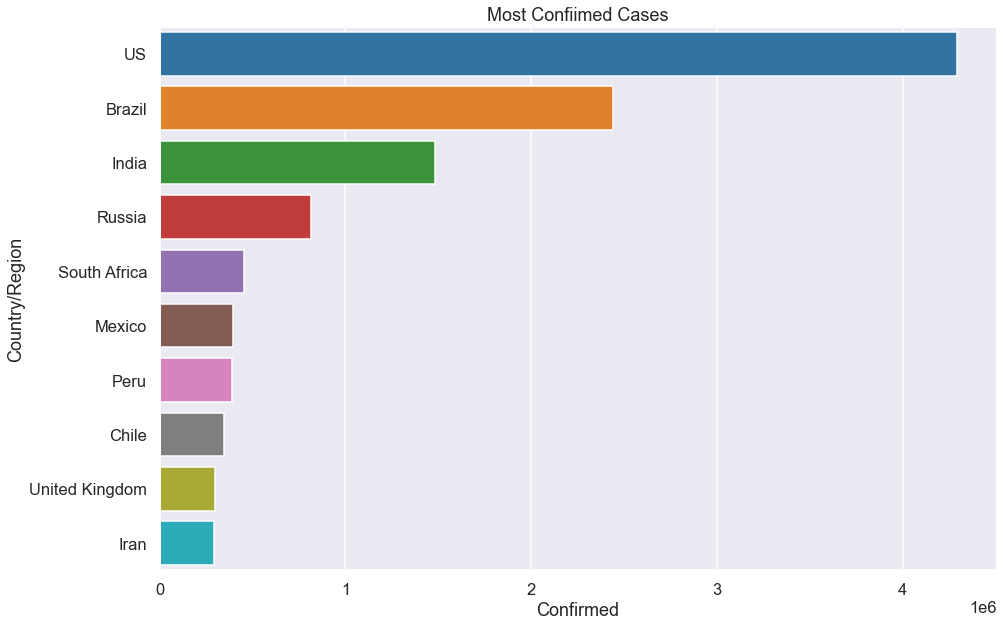

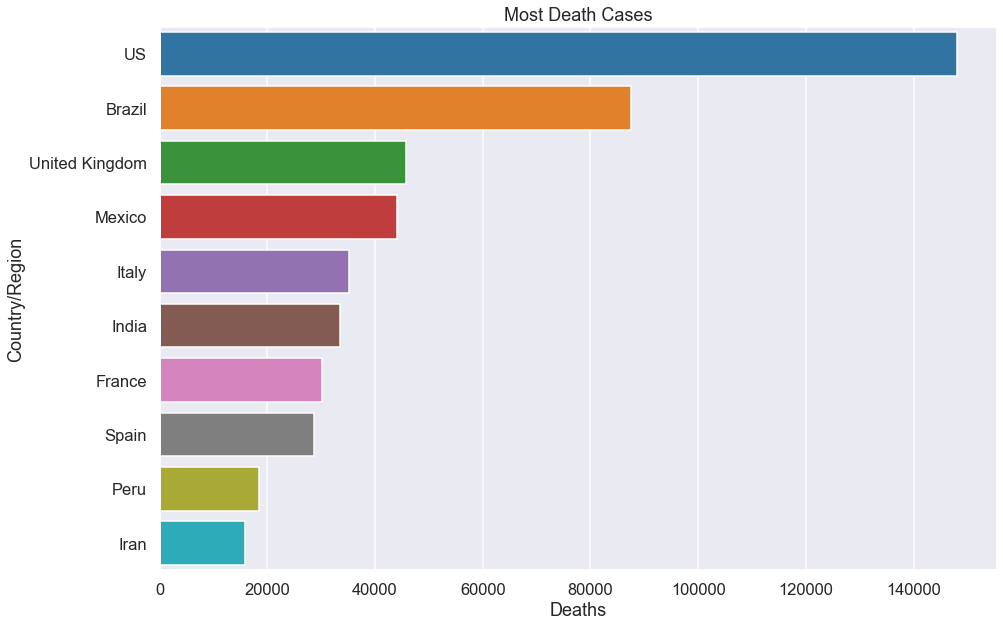

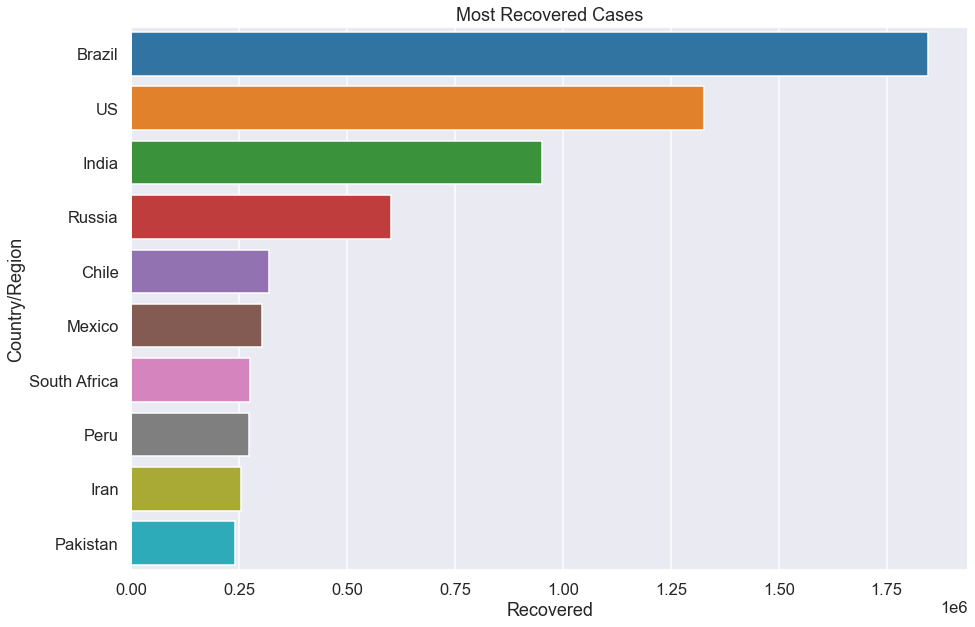

In [18]:
plt.figure(figsize=(15,10))
most_country_confirmed = analyzer.confirmedCasesByCountry()
sns.barplot(x=most_country_confirmed[:10], y=most_country_confirmed.index[:10])
plt.title('Most Confiimed Cases')


plt.figure(figsize=(15,10))
most_country_deaths = analyzer.deathCasesByCountry()
sns.barplot(x=most_country_deaths[:10], y=most_country_deaths.index[:10])
plt.title('Most Death Cases')


plt.figure(figsize=(15,10))
most_country_recovered = analyzer.recoveredCasesByCountry()
sns.barplot(x=most_country_recovered[:10], y=most_country_recovered.index[:10])
plt.title('Most Recovered Cases')
plt.show()

## Confimed, Deaths and Recovered by Date in the Whole World

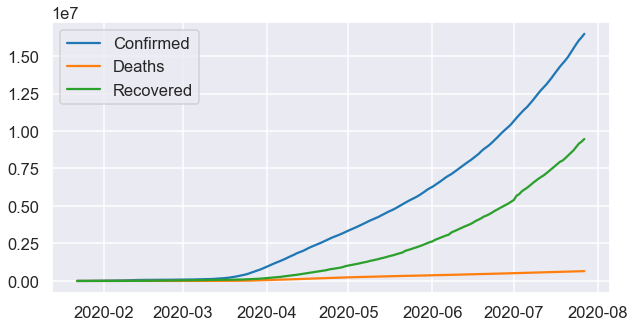

In [6]:
ax = plt.figure(figsize=(10,5)).subplots()

covid19_date_confirmed = analyzer.confirmedCasesByDate()
covid19_date_deaths = analyzer.deathCasesByDate()
covid19_date_recovered = analyzer.recoveredCasesByDate()

ax.plot(covid19_date_confirmed.index, covid19_date_confirmed, label='Confirmed')
ax.plot(covid19_date_deaths.index, covid19_date_deaths, label='Deaths')
ax.plot(covid19_date_recovered.index, covid19_date_recovered, label='Recovered')

plt.legend()

## Most Death & Recovery Rates
Death Rate: Number of deaths divided by number of confirmed cases \
Recovery Rate: Analogous to Death Rate

### Sorted by Death Rate

In [42]:
covid19_most_deathrate = analyzer.deathRateByCountry().sort_values(ascending=False).head(10)
pd.DataFrame(covid19_most_deathrate).style.background_gradient(cmap='Reds')

,Death Rate
Country/Region,
Yemen,28.562980
Belgium,14.785934
Italy,14.256596
Hungary,13.399281
Netherlands,11.553875
Mexico,11.131030
Spain,10.436787
Western Sahara,10.000000
Chad,8.134490


### Sorted by Recovery Rate

In [43]:
covid19_most_recoveryrate = analyzer.recoveryRateByCountry().sort_values(ascending=False).head(10)
pd.DataFrame(covid19_most_recoveryrate).style.background_gradient(cmap='Greens')

,Recovery Rate
Country/Region,
Holy See,100.000000
Grenada,100.000000
Dominica,100.000000
United Kingdom,100.000000
China,99.842520
Djibouti,98.379126
Iceland,98.327940
Australia,98.179059
Brunei,97.872340


## Active cases in the 5 countries which have the most Death Rate 

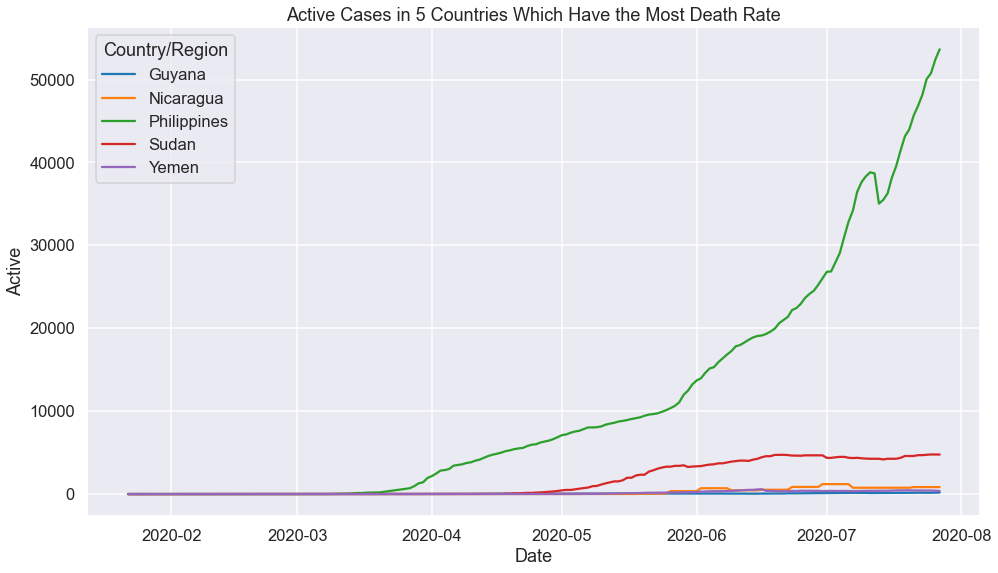

In [9]:
plt.figure(figsize=(16,9))
sns.lineplot(data=analyzer.getDataFrame()[analyzer.getDataFrame()['Country/Region'].isin(['Yemen', 'Sudan', 'Nicaragua', 'Guyana', 'Philippines'])], x = 'Date' , y = 'Active', hue='Country/Region')
plt.title('Active Cases in 5 Countries Which Have the Most Death Rate')
plt.show()

# Vaccination analysis

## The analyzer

In [42]:
class VaccinationEDA_World:
    def __init__(self):
        vaccine_df = pd.read_csv('./Dataset/owid-covid-data.csv', usecols=['continent','location','date','new_vaccinations', 'total_vaccinations', 'people_fully_vaccinated', \
                                                                            'people_fully_vaccinated_per_hundred', 'total_vaccinations_per_hundred', 'total_boosters', 'population'])
        vaccine_df['date'] = pd.to_datetime(vaccine_df['date'], format="%Y-%m-%d")
        self.data = vaccine_df
    
    def plotMeasures(self, country):
        fig = plt.figure(figsize=(30,10))
        ax = fig.subplots(2,2)
    
        sns.lineplot(data=self.data[['location', 'date', 'total_vaccinations_per_hundred']][self.data['location']==country].dropna(), x='date', y='total_vaccinations_per_hundred', ax=ax[0,0])
        ax[0,0].set_ylabel('Total Vaccinations (%)')
        
        sns.lineplot(data=self.data[['location', 'date', 'people_fully_vaccinated_per_hundred']][self.data['location']==country].dropna(), x='date', y='people_fully_vaccinated_per_hundred', ax=ax[0,1])
        ax[0,1].set_ylabel('People Fully Vaccinated (%)')
        
        sns.lineplot(data=self.data[['location', 'date', 'new_vaccinations']][self.data['location']==country].dropna(), x='date', y='new_vaccinations', ax=ax[1,0])
        ax[1,0].set_ylabel('New Vaccinations')
        
        sns.lineplot(data=self.data[['location', 'date', 'total_boosters']][self.data['location']==country].dropna(), x='date', y='total_boosters', ax=ax[1,1])
        ax[1,1].set_ylabel('Total Boosters')
        
        for i in range(2):
            for j in range(2):
                ax[i,j].set_xlabel('Date')
        
        
        fig.suptitle(country, fontsize=40)
    
    def coutriesWithHighestVaccinationSpeed(self, head=10):
        countries = self.data[~self.data.isin(['Africa', 'Europe', 'European Union', 'North America', 'South America', 'Asia', 'Upper middle income', 'Lower middle income', 'High income', 'World'])]['location']
        highest_speed = self.data[self.data['location'].isin(countries)].groupby('location', as_index=False)['new_vaccinations'].mean().sort_values('new_vaccinations', ascending=False).head(head)
        highest_speed['new_vaccinations'] = highest_speed['new_vaccinations'].apply(lambda x: int(x))
        return highest_speed.style.background_gradient(cmap='Greens')
    
    def getDataFrame(self):
        return self.data  
            
vaccine_analyzer  = VaccinationEDA_World()
vaccine_analyzer.getDataFrame()    

,continent,location,date,total_vaccinations,people_fully_vaccinated,total_boosters,new_vaccinations,total_vaccinations_per_hundred,people_fully_vaccinated_per_hundred,population
0,Asia,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
1,Asia,Afghanistan,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
2,Asia,Afghanistan,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
3,Asia,Afghanistan,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
4,Asia,Afghanistan,2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
...,...,...,...,...,...,...,...,...,...,...
346614,Africa,Zimbabwe,2023-09-30,NaN,NaN,NaN,NaN,NaN,NaN,16320539.0
346615,Africa,Zimbabwe,2023-10-01,NaN,NaN,NaN,NaN,NaN,NaN,16320539.0
346616,Africa,Zimbabwe,2023-10-02,NaN,NaN,NaN,NaN,NaN,NaN,16320539.0
346617,Africa,Zimbabwe,2023-10-03,NaN,NaN,NaN,NaN,NaN,NaN,16320539.0


## Vaccination Progress in United States

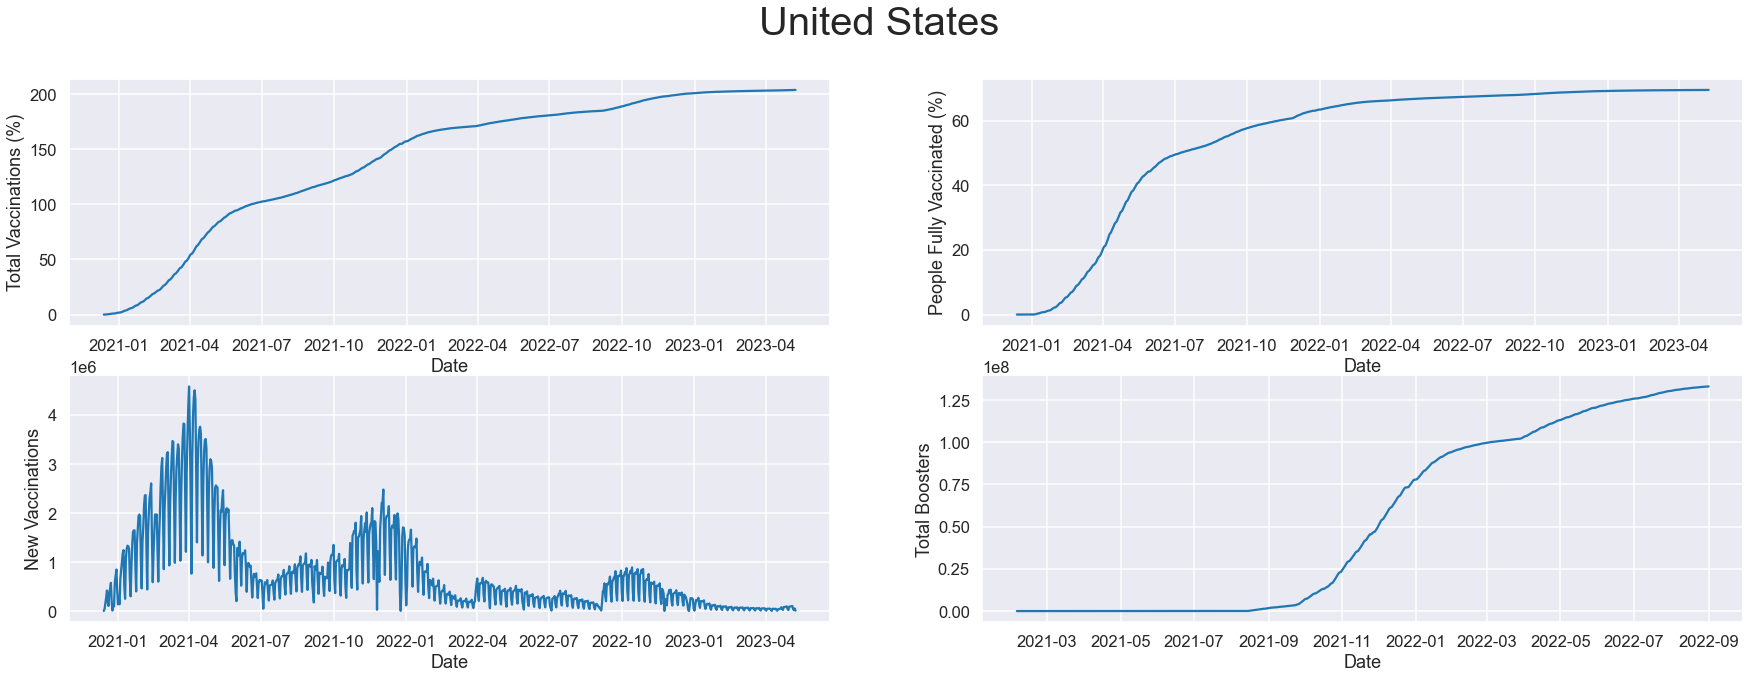

In [43]:
vaccine_analyzer.plotMeasures(country='United States')

## Vaccination Progress in Iran

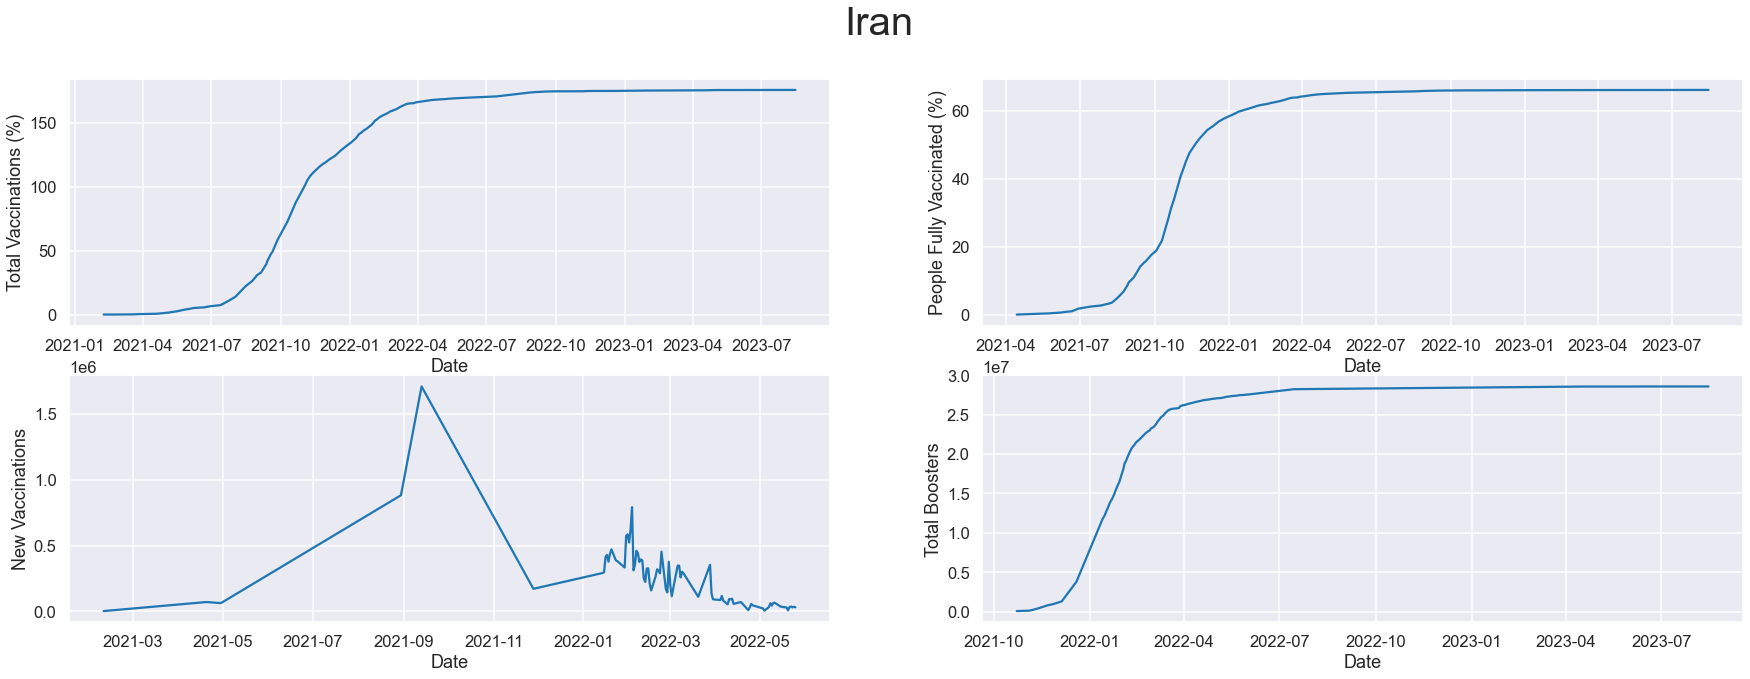

In [44]:
vaccine_analyzer.plotMeasures(country='Iran')

## Vaccine rate in most affected countries 

<AxesSubplot:xlabel='date', ylabel='total_vaccinations_per_hundred'>

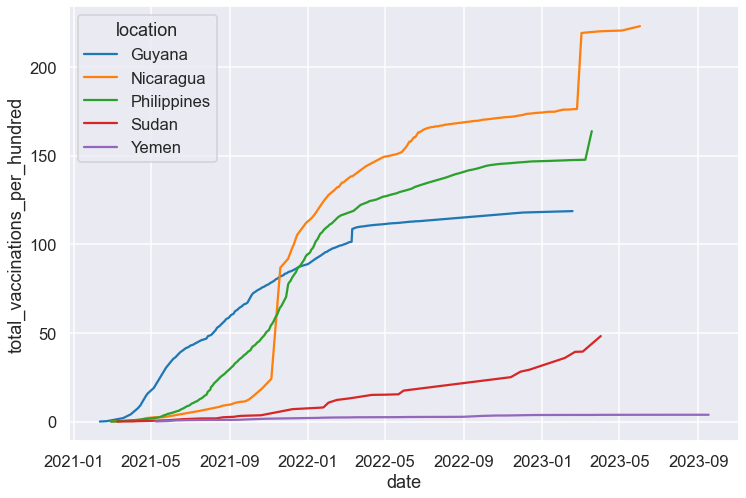

In [29]:
plt.figure(figsize=(12,8))
sns.lineplot(data=vaccine_analyzer.getDataFrame()[vaccine_analyzer.getDataFrame()['location'].isin(['Yemen', 'Sudan', 'Nicaragua', 'Guyana', 'Philippines'])], x='date', y='total_vaccinations_per_hundred', hue='location')

## The countries having the highest vaccination speed 
we measure the speed by calcuating the average of new vaccined cases by day

In [28]:
vaccine_analyzer.coutriesWithHighestVaccinationSpeed(head=20)

,location,new_vaccinations
42,China,5147424
96,India,2230230
97,Indonesia,808177
231,United States,771588
28,Brazil,724200
164,Pakistan,587713
16,Bangladesh,513193
105,Japan,489532
136,Mexico,444550
171,Philippines,426459
